# Visualizing Data
One of the obvious tasks when analzing data, is creating visualizations. This notebook contains thus examples, how to create those with Python.

In [8]:
from datetime import datetime
import requests
url = "http://worldtimeapi.org/api/timezone/Europe/Berlin"

def measureResponseTimes(url, attempts):
    timeticks = []
    values = []
    result = {}

    for i in range(attempts):
        response = requests.post(url)
        timeticks.append(datetime.now())
        values.append(response.elapsed.total_seconds()) 
    result["timeticks"] = timeticks
    result["values"] = values
    return result

result = measureResponseTimes(url, 10)

## Seaborn

Seaborn is a library on top of matplotlib that provides a number of helpful visualizations. An overview of visualizations can be found [here](https://seaborn.pydata.org/examples/). The following example shows, how to plot response times.

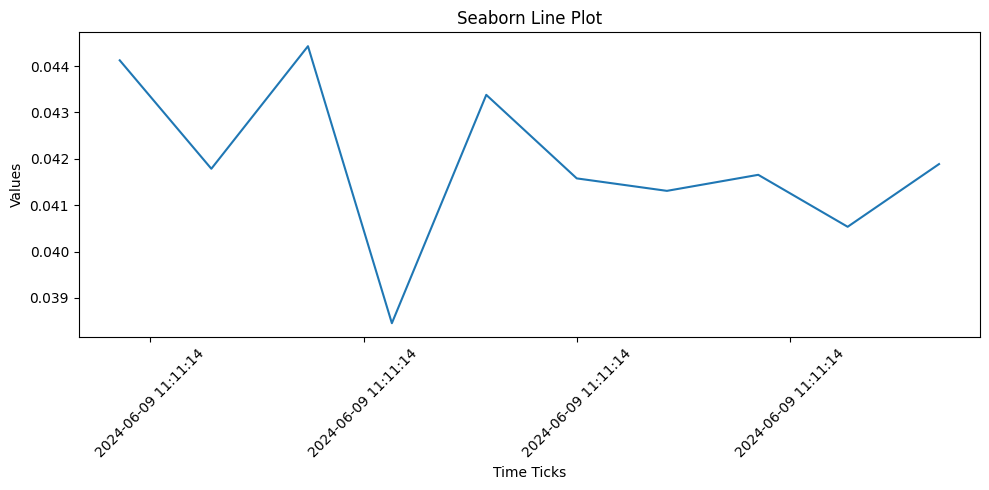

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

df = pd.DataFrame(result)

plt.figure(figsize=(10, 5))
sns.lineplot(x='timeticks', y='values', data=df)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Seaborn Line Plot')
plt.xlabel('Time Ticks')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Tasks
* modify measurement function, to measure a list of URLs
* plot results in a single line plot